<a href="https://colab.research.google.com/github/de218031/Python/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
import numpy as np
import pandas as pd

#plotting modules
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#classification modules
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


#import performance scores
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
warnings.filterwarnings('ignore')

In [2]:
def missing_value_check(dataset):
    # columns that have null values greater than 5% -> It gives percentage
    percent_missing = dataset.isnull().sum() * 100 / len(dataset)
    # no of missing
    num_missing = dataset.isnull().sum()
    # sorting values in descending order
    percent_missing = percent_missing.sort_values(ascending=False)
    # inserting in percentages into new dataframe
    missing_value_df = pd.DataFrame({'percent_missing': percent_missing, 'Num_missing_val': num_missing})
    # Sorting values in ascending order
    missing_value_df = missing_value_df.sort_values(by=['percent_missing'], ascending=False)

    return missing_value_df, percent_missing


# create a function to find outliers using IQR
def detecting_outliers(dataset):
    q1 = dataset.quantile(0.25)
    q3 = dataset.quantile(0.75)
    IQR = q3 - q1
    upperlimit = dataset < (q1 - 1.5 * IQR)
    lowerlimit = dataset > (q3 + 1.5 * IQR)
    outliers = dataset[upperlimit | lowerlimit]

    return outliers, upperlimit, lowerlimit


# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr


In [3]:
# Validation metrics for classification
def validationmetrics(model, testX, testY, verbose=True):
    predictions = model.predict(testX)

    # Accuracy
    accuracy = accuracy_score(testY, predictions) * 100

    # Precision
    precision = precision_score(testY, predictions, pos_label='positive', average='micro') * 100

    # Recall
    recall = recall_score(testY, predictions, pos_label='positive', average='micro') * 100

    # F-Score
    f_score = f1_score(testY, predictions, average="micro")

    if verbose:
        print("\n Accuracy: \n", accuracy)
        print("\n Precision of event Happening: \n", precision)
        print("\n Recall of event Happening: \n", recall)
        print("\n F-Score:\n", f_score)

        # confusion Matrix
        print("\n Confusion Matrix: \n", confusion_matrix(testY, predictions))
        conf_mat = confusion_matrix(testY, predictions)
        f, ax = plt.subplots(figsize=(5, 5))
        sns.heatmap(conf_mat, annot=True, linewidths=0.7, linecolor="red", fmt=".0f", ax=ax)
        plt.xlabel("y_pred")
        plt.ylabel("y_true")
        plt.show()

    res_map = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f_score": f_score,
        "model_obj": model
    }
    return res_map

In [4]:
from google.colab import files
df = files.upload()



Saving season-1516.csv to season-1516.csv


In [5]:
import io
df = pd.read_csv(io.StringIO(df['season-1516.csv'].decode('utf-8')))

In [6]:
df

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,SP1,21/08/2015,Malaga,Sevilla,0,0,D,0,0,D,...,1.92,24,0.25,2.02,1.95,1.94,1.90,3.22,3.50,2.36
1,SP1,22/08/2015,Ath Madrid,Las Palmas,1,0,H,1,0,H,...,1.96,26,-1.75,2.02,1.95,1.95,1.89,1.25,6.24,16.90
2,SP1,22/08/2015,Espanol,Getafe,1,0,H,1,0,H,...,1.56,27,-0.50,1.95,1.90,2.01,1.94,2.10,3.28,4.19
3,SP1,22/08/2015,La Coruna,Sociedad,0,0,D,0,0,D,...,1.56,26,0.00,1.82,1.78,2.15,2.07,2.44,3.41,3.15
4,SP1,22/08/2015,Vallecano,Valencia,0,0,D,0,0,D,...,2.04,27,0.50,1.90,1.83,2.08,2.01,2.93,3.68,2.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,SP1,15/05/2016,Betis,Getafe,2,1,H,0,0,D,...,2.16,30,0.75,2.01,1.96,1.95,1.90,3.40,3.86,2.14
376,SP1,15/05/2016,Espanol,Eibar,4,2,H,2,0,H,...,2.12,29,-0.50,2.06,1.99,1.91,1.87,2.00,3.76,3.95
377,SP1,15/05/2016,Malaga,Las Palmas,4,1,H,2,1,H,...,2.02,29,-0.75,2.12,2.07,1.85,1.80,1.67,4.20,5.44
378,SP1,15/05/2016,Sp Gijon,Villarreal,2,0,H,1,0,H,...,1.98,30,-1.25,2.09,2.03,1.87,1.83,1.48,5.08,6.89


In [7]:
missing_df, percent_missing = missing_value_check(df)
print(missing_df)
print(missing_df[percent_missing>0.08])

     percent_missing  Num_missing_val
PSH         0.263158                1
PSA         0.263158                1
PSD         0.263158                1
AC          0.000000                0
AST         0.000000                0
..               ...              ...
VCD         0.000000                0
VCH         0.000000                0
WHA         0.000000                0
WHD         0.000000                0
WHH         0.000000                0

[64 rows x 2 columns]
     percent_missing  Num_missing_val
PSH         0.263158                1
PSA         0.263158                1
PSD         0.263158                1


In [8]:
for i in df.columns:
    df[i] = df[i].interpolate(method ='linear', limit_direction ='forward')

In [9]:
print(df[df.duplicated(keep=False)])

Empty DataFrame
Columns: [Div, Date, HomeTeam, AwayTeam, FTHG, FTAG, FTR, HTHG, HTAG, HTR, HS, AS, HST, AST, HF, AF, HC, AC, HY, AY, HR, AR, B365H, B365D, B365A, BWH, BWD, BWA, IWH, IWD, IWA, LBH, LBD, LBA, PSH, PSD, PSA, WHH, WHD, WHA, VCH, VCD, VCA, Bb1X2, BbMxH, BbAvH, BbMxD, BbAvD, BbMxA, BbAvA, BbOU, BbMx>2.5, BbAv>2.5, BbMx<2.5, BbAv<2.5, BbAH, BbAHh, BbMxAHH, BbAvAHH, BbMxAHA, BbAvAHA, PSCH, PSCD, PSCA]
Index: []

[0 rows x 64 columns]


In [10]:
print(df.isnull().sum())

Div         0
Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
           ..
BbMxAHA     0
BbAvAHA     0
PSCH        0
PSCD        0
PSCA        0
Length: 64, dtype: int64


In [11]:
for i in df:
    if df.dtypes[i] == object:
        print(i)

Div
Date
HomeTeam
AwayTeam
FTR
HTR


In [12]:
df = df.drop(columns=['Date'])

In [13]:
label_encoder = preprocessing.LabelEncoder()

In [15]:
label_encoder = preprocessing.LabelEncoder()

def onehotencoding_v2(df, cols=[]):
    for i in cols:
         df[i] = label_encoder.fit_transform(df[i])
    return df

In [16]:
df = onehotencoding_v2(df, ['HomeTeam', 'AwayTeam' , 'FTR', 'HTR','Div'])

In [ ]:
from sklearn.model_selection import train_test_split

In [17]:
X = df.drop("FTR", axis=1)
y = df["FTR"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(x_train.shape, x_test.shape)

(304, 62) (76, 62)


In [18]:
knn = KNeighborsClassifier(n_neighbors=3).fit(x_train, y_train)


 Accuracy: 
 51.31578947368421

 Precision of event Happening: 
 51.31578947368421

 Recall of event Happening: 
 51.31578947368421

 F-Score:
 0.5131578947368421

 Confusion Matrix: 
 [[14  2  4]
 [10  7  7]
 [ 8  6 18]]


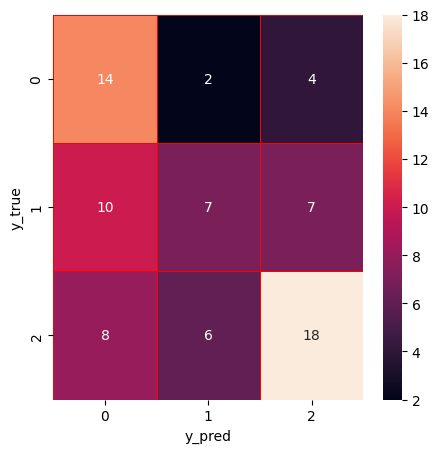

In [19]:
knn_data = validationmetrics(knn, x_test, y_test, verbose=True)

score_knn = knn_data['accuracy']
knn_re = knn_data['recall']
knn_f1 = knn_data['f_score']
knn_pre = knn_data['precision']

PermutationExplainer explainer: 305it [01:10,  3.97it/s]


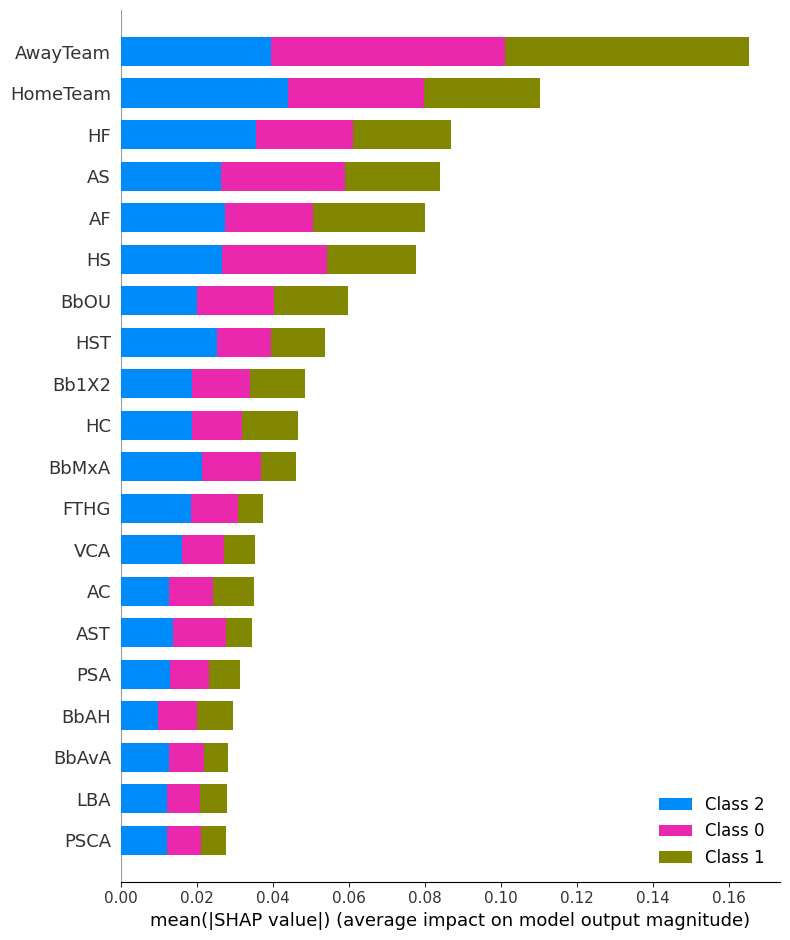

In [41]:
import shap
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
masker = shap.maskers.Independent(x_train)
explainer = shap.Explainer(knn.predict_proba, masker, feature_names=x_train.columns.tolist())
shap_values = explainer(x_train)
shap.summary_plot(shap_values, x_train)